# Exercício

# Kmeans

**Segmentação de Clientes com K-Means**

**Arquivo Mall_Customers.csv**

**Passos:**

1. Carregue o conjunto de dados de clientes de um arquivo CSV usando a biblioteca pandas.
2. Explore e visualize os dados para entender suas características e distribuição.
3. Selecione as colunas relevantes para a segmentação, como idade, renda anual e gastos anuais.
4. Pré-processe os dados, se necessário (normalização, tratamento de valores ausentes, etc.).
5. Importe a classe `KMeans` da biblioteca scikit-learn.
6. Inicialize o modelo K-Means com um número de clusters desejado.
7. Treine o modelo usando os dados pré-processados.
8. Obtenha os rótulos de cluster para cada cliente no conjunto de dados.
9. Analise e interprete os clusters resultantes.
10. Visualize os clusters para entender como os clientes estão agrupados.
11. Explore diferentes números de clusters para encontrar a melhor segmentação.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import math
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.cluster import KMeans
from sklearn import tree
import graphviz

# KMEANS

In [7]:
# Carregar o conjunto de dados
data = pd.read_csv('../../Datasets/Mall_Customers.csv',index_col='CustomerID')
data

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [10]:
data.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
data.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [35]:
# Selecionar só 2 colunas para visualização
selected_columns = ['Annual_Income_(k$)', 'Spending_Score']
df = data[selected_columns]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # método inércia retorna o valor wcss do modelo
    wcss.append(kmeans.inertia_)

c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


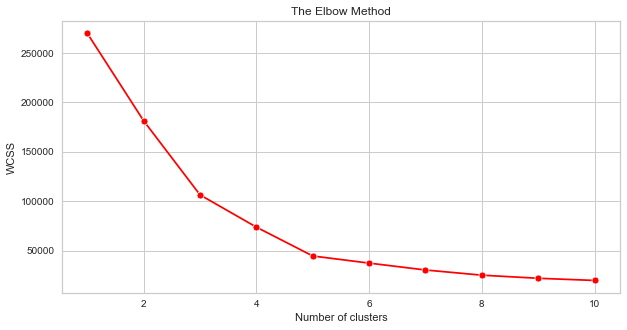

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

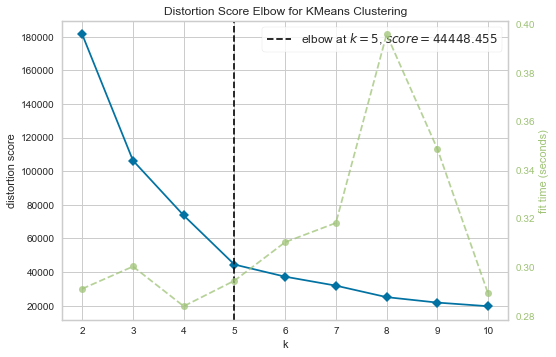

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from yellowbrick.cluster import KElbowVisualizer

model =  KMeans(random_state=15)
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(df)
visualizer.show()

In [38]:
# Inicializar o modelo K-Means
num_clusters = 5
kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', random_state = 42)
predictions = kmeans.fit_predict(df)

c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\t

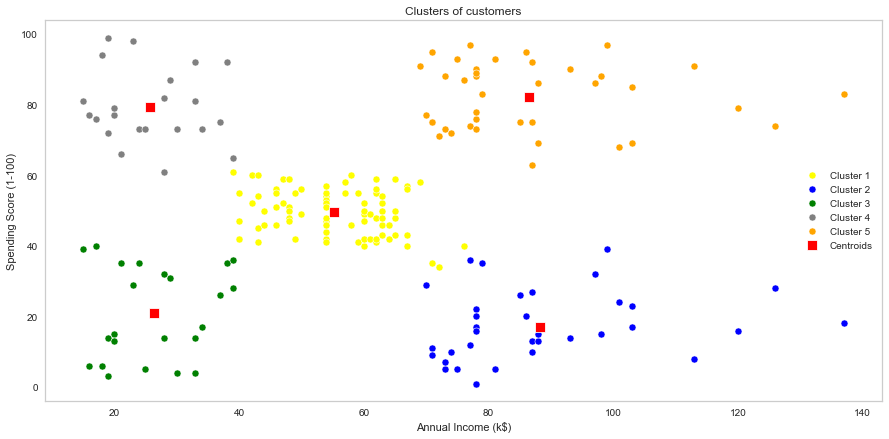

In [39]:
# Visualização dos grupos
plt.figure(figsize=(15,7))

sns.scatterplot(df[predictions == 0]['Annual_Income_(k$)'].values, df[predictions == 0]['Spending_Score'].values, color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(df[predictions == 1]['Annual_Income_(k$)'].values, df[predictions == 1]['Spending_Score'].values, color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df[predictions == 2]['Annual_Income_(k$)'].values, df[predictions == 2]['Spending_Score'].values, color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(df[predictions == 3]['Annual_Income_(k$)'].values, df[predictions == 3]['Spending_Score'].values, color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(df[predictions == 4]['Annual_Income_(k$)'].values, df[predictions == 4]['Spending_Score'].values, color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=100,marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


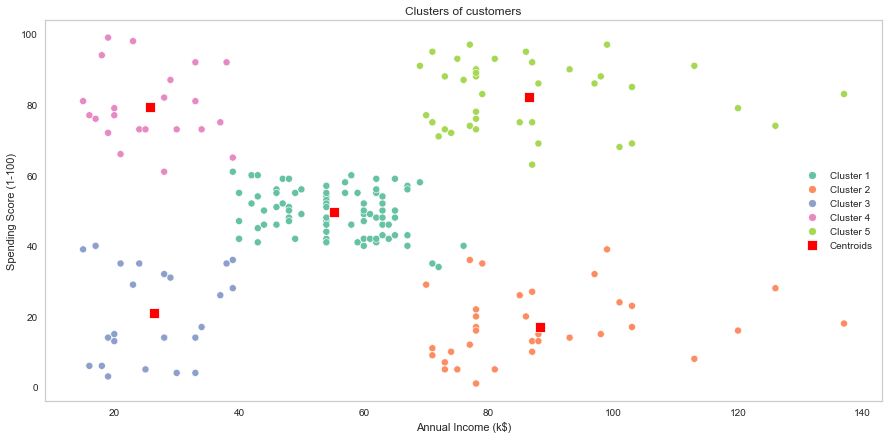

In [44]:
# Visualização dos grupos

plt.figure(figsize=(15,7))

df['predictions'] = predictions
df['label_predictions'] = pd.cut(df['predictions'], bins=5, labels=[f'Cluster {i}' for i in range(1, 6)])

sns.scatterplot(df['Annual_Income_(k$)'].values, df['Spending_Score'].values, hue = df['label_predictions'].values,palette='Set2',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=100,marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()